<a href="https://colab.research.google.com/github/namanphy/EVA5/blob/main/S13/YoloV3_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Recognition using YoloV3


In [1]:
# Mount your google drive - To access the `YoloV3_Contents` folder

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import time
import glob
import torch
import os
from IPython.display import Image, clear_output 

print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.8.0+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


--------

In [3]:
# couting number of images in train

path_to_images = '/content/drive/MyDrive/YoloV3_Contents/YoloV3/data/HardhatVestMaskBoots/labels'

path, dirs, files = next(os.walk(path_to_images))
file_count = len(files)
file_count

3526

In [4]:
cd drive/MyDrive/YoloV3_Contents/YoloV3/

/content/drive/MyDrive/YoloV3_Contents/YoloV3


In [5]:
ls

cfg/       models.py     runs/            train_batch0.png  weights/
data/      __pycache__/  test_batch0.png  train.py
detect.py  results.txt   test.py          utils/


In [ ]:
! python train.py --data data/HardhatVestMaskBoots/HardhatVestMaskBoots.data --batch 16 --cache --cfg cfg/yolov3-HardhatVestMaskBoots.cfg --epochs 64

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='cfg/yolov3-HardhatVestMaskBoots.cfg', data='data/HardhatVestMaskBoots/HardhatVestMaskBoots.data', device='', epochs=64, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-03-20 04:58:19.913407: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (3034 found, 131 missing, 38 empty, 0 duplicate, for 3203 images): 100% 3203/3203 [16:30<00:00,  3.23it/s]
Caching images (1.8GB): 100% 3203/3203 [22:03<00:00,  2.42it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 dupli

## Inferencing

In [8]:
! python detect.py --conf-thres 0.3 --output output

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-HardhatVestMaskBoots.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/HardhatVestMaskBoots/HardhatVestMaskBoots.names', output='output', save_txt=False, source='data/test', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
image 1/4 data/test/53.jpg: 512x384 2 hardhats, 3 vests, 1 masks, Done. (0.039s)
image 2/4 data/test/71.jpg: 512x384 1 hardhats, 1 masks, Done. (0.039s)
image 3/4 data/test/9.jpg: 512x384 3 hardhats, Done. (0.039s)
image 4/4 data/test/9aa90c5bef.jpg: 320x512 3 hardhats, 4 vests, 4 masks, Done. (0.033s)
Results saved to /content/drive/My Drive/YoloV3_Contents/YoloV3/output
Done. (1.248s)


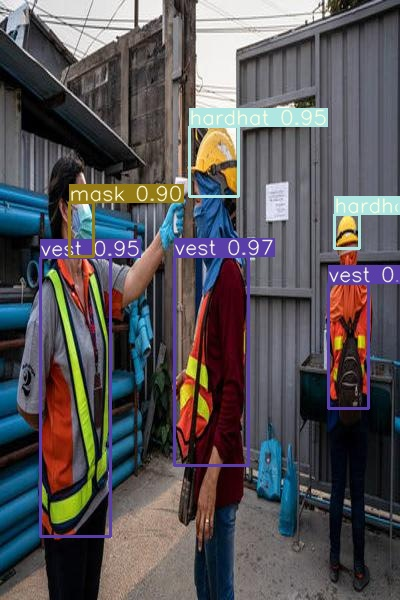

In [12]:
# Viewing a sample
Image(filename='/content/drive/MyDrive/YoloV3_Contents/YoloV3/output/53.jpg', width=300)

### Using the trained model for infering on video data

In [26]:
# Extracting frames from the video

! ffmpeg -i ../test_videos/construction_worker_dance_2.mp4 data/test/image-%3d.jpg

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [16]:
# Extracting audio from the video

! ffmpeg -i ../test_videos/construction_worker_dance_2.mp4 -f mp3 -ab 192000 -vn ../test_videos/audio_2.mp3

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [28]:
! python detect.py --conf-thres 0.2 --output output

Streaming output truncated to the last 5000 lines.
image 211/5208 data/test/image-1100.jpg: 320x512 3 hardhats, 1 bootss, Done. (0.020s)
image 212/5208 data/test/image-1101.jpg: 320x512 3 hardhats, Done. (0.020s)
image 213/5208 data/test/image-1102.jpg: 320x512 4 hardhats, 1 bootss, Done. (0.020s)
image 214/5208 data/test/image-1103.jpg: 320x512 4 hardhats, 1 bootss, Done. (0.020s)
image 215/5208 data/test/image-1104.jpg: 320x512 4 hardhats, 2 bootss, Done. (0.020s)
image 216/5208 data/test/image-1105.jpg: 320x512 4 hardhats, 1 bootss, Done. (0.020s)
image 217/5208 data/test/image-1106.jpg: 320x512 4 hardhats, 1 bootss, Done. (0.020s)
image 218/5208 data/test/image-1107.jpg: 320x512 4 hardhats, 1 bootss, Done. (0.020s)
image 219/5208 data/test/image-1108.jpg: 320x512 4 hardhats, 3 bootss, Done. (0.020s)
image 220/5208 data/test/image-1109.jpg: 320x512 4 hardhats, 3 bootss, Done. (0.020s)
image 221/5208 data/test/image-111.jpg: 320x512 5 hardhats, 1 vests, 2 bootss, Done. (0.020s)
image

In [29]:
# Making back video from the inferenced images

! ffmpeg -i output/image-%3d.jpg -framerate 24 -r 24 output_video.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [30]:
# Adding an audio to the video

! ffmpeg -i output_video.mp4 -i ../test_videos/audio_2.mp3 -shortest -shortest final_video.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib